## 1. Постановка задачи и  формулирование гипотез

Для начала работы с данными мы загружаем их из указанного [источника](https://raw.githubusercontent.com/meleshko-anastasiia/DZ/refs/heads/main/Computers.csv). Данные предоставлены в формате CSV, поэтому мы используем библиотеку pandas для их обработки. После загрузки выполняется предварительный просмотр первых строк, чтобы понять структуру и содержание таблицы.

Теперь перейдем к формулировке задачи. В предоставленных данных есть несколько переменных, включая целевую переменную price, которая отображает стоимость компьютера.

Задача:

1. Использовать переменные, такие как speed, hd, ram, screen и другие, для предсказания цены компьютера. Это делает задачу задачей регрессии.
2. Практическая ценность заключается в автоматизации оценки стоимости компьютеров, что полезно для интернет-магазинов, вторичных рынков и анализа клиентских предпочтений.
   

In [2]:
import pandas as pd

# Указываем URL с данными
url = "https://raw.githubusercontent.com/meleshko-anastasiia/DZ/refs/heads/main/Computers.csv"

# Загружаем данные с помощью pandas
data = pd.read_csv(url)

# Выводим первые строки для анализа структуры данных
data.head()

,rownames,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1,1499,25,80,4,14,no,no,yes,94,1
1,2,1795,33,85,2,14,no,no,yes,94,1
2,3,1595,25,170,4,15,no,no,yes,94,1
3,4,1849,25,170,8,14,no,no,no,94,1
4,5,3295,33,340,16,14,no,no,yes,94,1


### Гипотезы
Выберем переменные и сформулируем гипотезу об их взаимосвязи:

- Предположим, что чем больше рекламы, тем выше цена
- Предположим, что скорость работы компьютеров увеличивается с увеличением объема оперативной памяти.
- Предположим, что тренд зависит от рекламы
- Предположим, что цена разная у различных сегментов премиум
- Предположим, что тренд меняется в зависимости от памяти
- Предположим, что мультимедиа есть только в премиум сегменте

# Проведем разведку, описание переменных

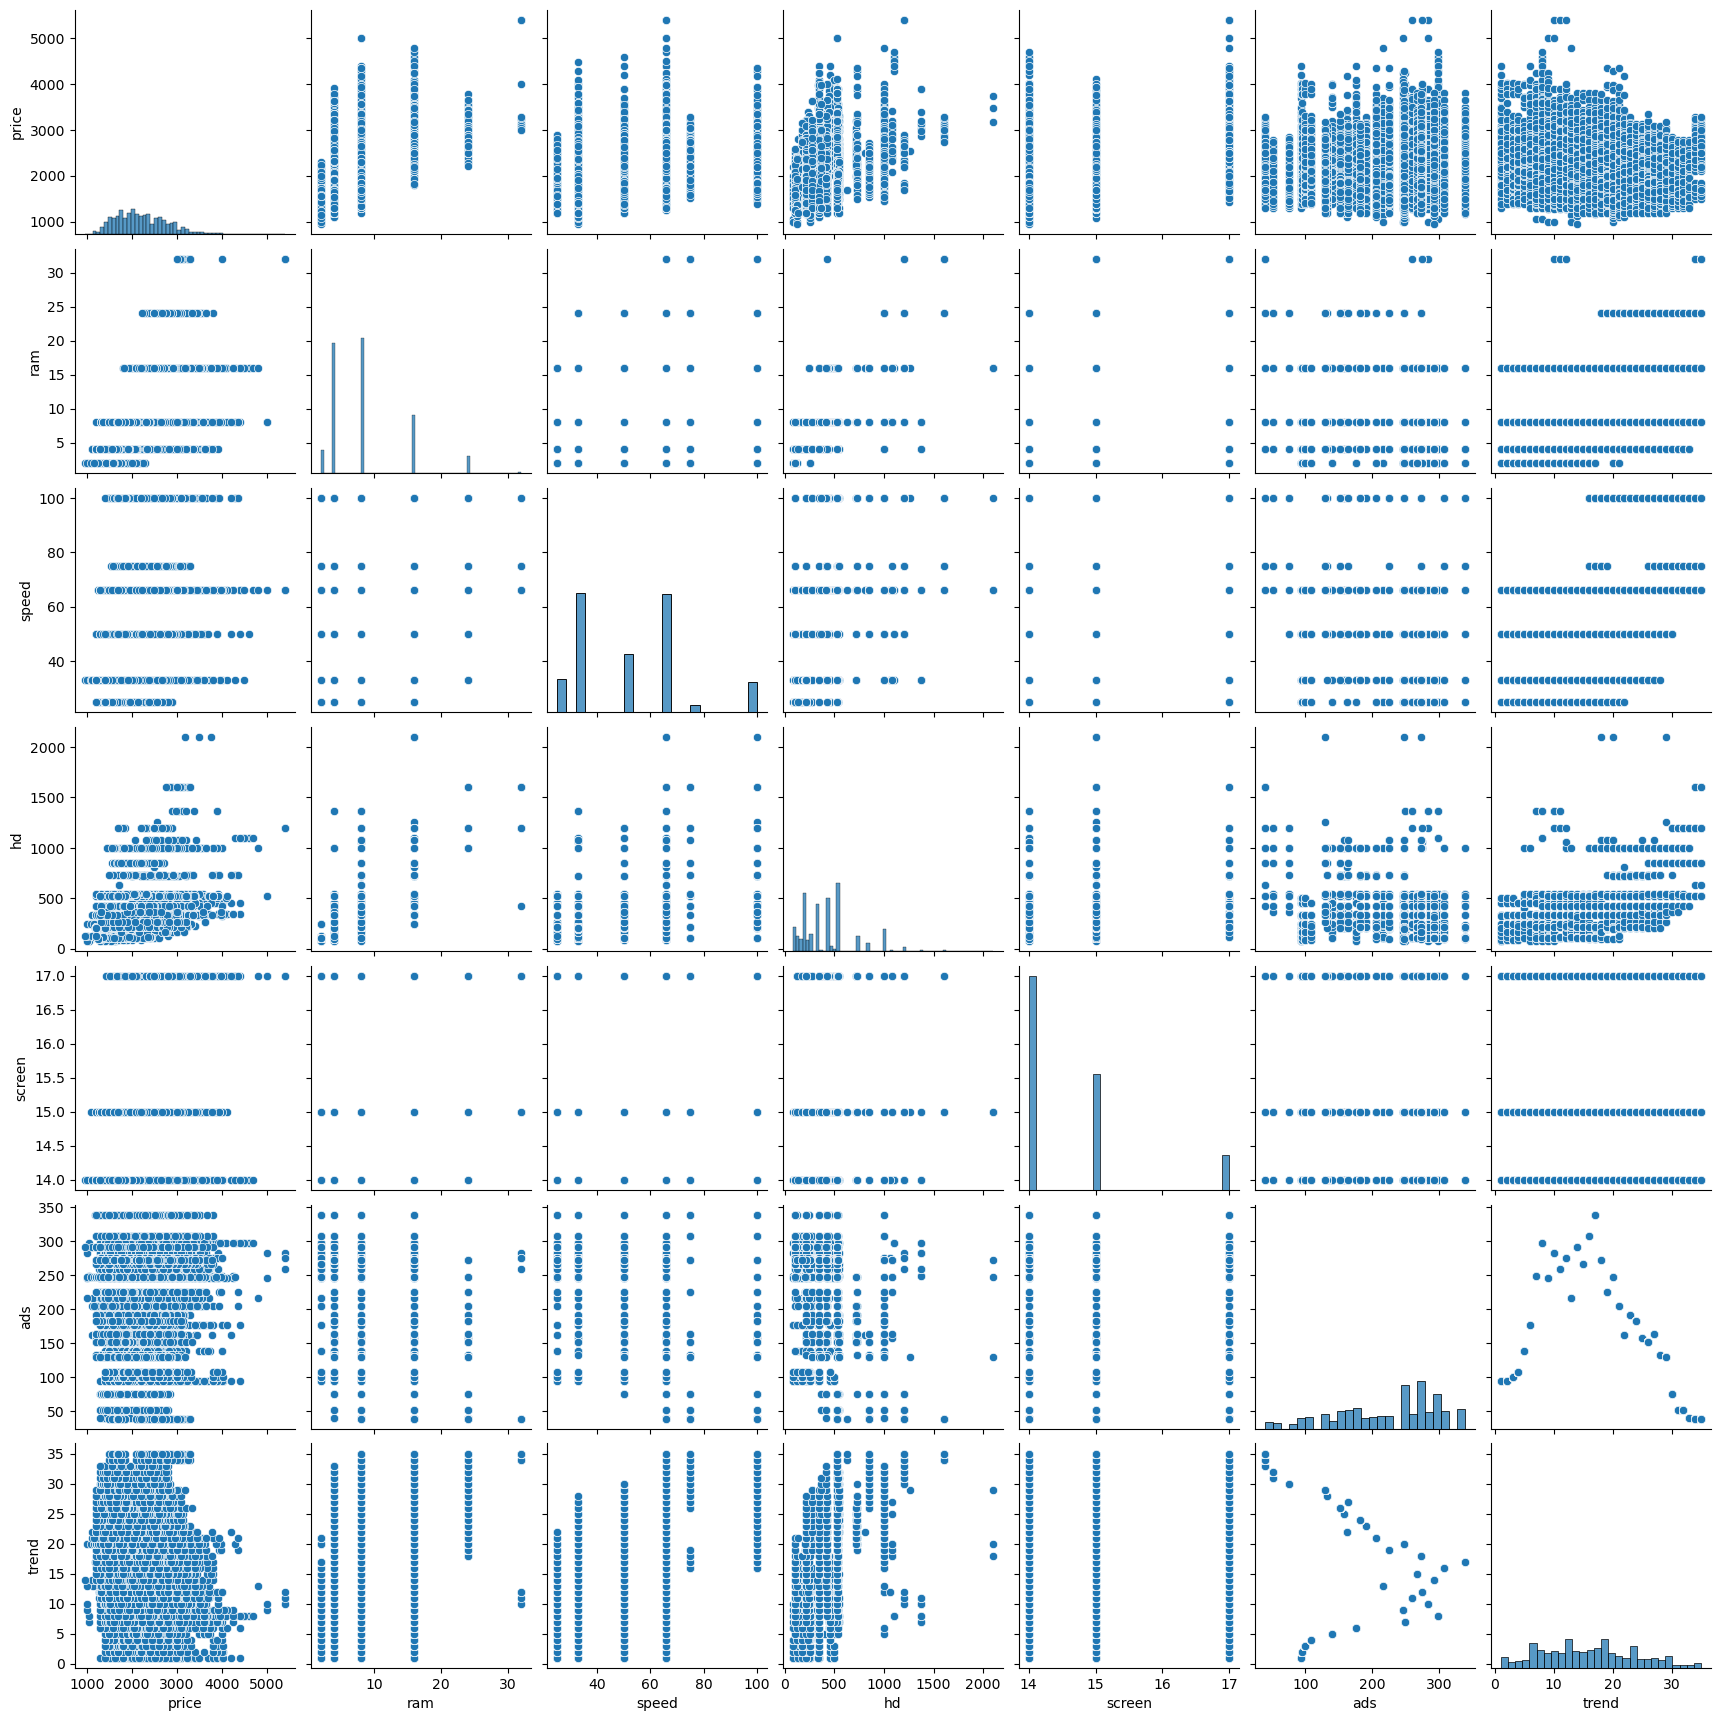

In [62]:
# Уберем информацию об ошибках
import warnings
warnings.filterwarnings('ignore')
#Какие переменные будем использовать, представим в графическом виде для удобства
sns.pairplot(data[["price", "premium", "ram", "multi", "speed", "hd", "screen", "cd", "ads", "trend"]])

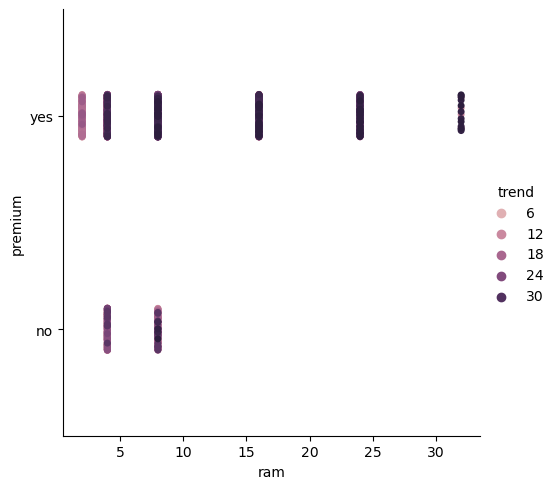

In [108]:
# Построим график на основе предположения связи тренда и премиум сегмента
g = sns.catplot(data, 
                x="ram", y="premium", 
                hue="trend")

 В премиум сегменте разнообразие тренда памяти больше

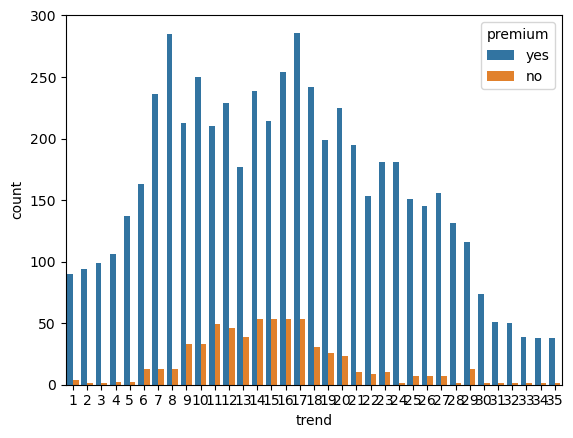

In [104]:
# Построим график на основе предположения о взаимосвязи тренда и премиум сегмента
sns.countplot(x = 'trend', hue = 'premium', data = data);


 У премиального сегмента выше тренд

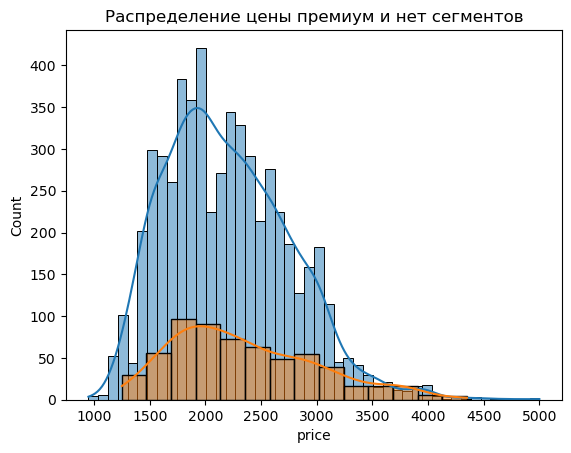

In [80]:
# Построим график на основе предположения связи цены и сегмента premium
df1 = data.loc[data['premium']=='yes', 'price']
df2 = data.loc[data['premium']=='no', 'price']

fig = plt.figure()
plt.title('Распределение цены премиум и нет сегментов')
sns.histplot(df1[df1<5000], kde = True)
sns.histplot(df2[df2<5000], kde = True)
plt.show()

По графику предпологаем, что в разброс цен в преиум сегменте больше.

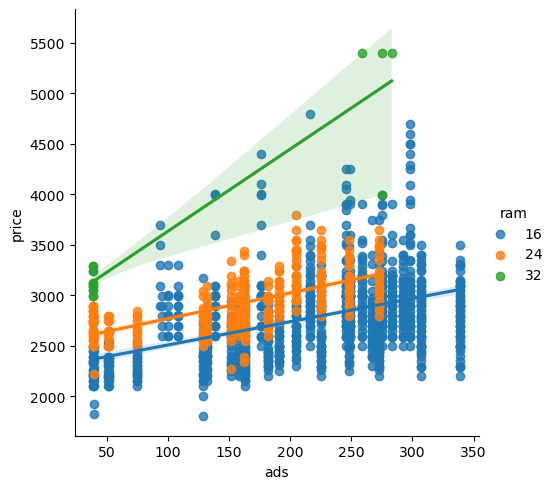

In [71]:
# Построим график на основе предположения о взаимосвязи цены и рекламы
sns.lmplot(
    data = data[(data['ads']>0)&(data['price']>0)&(data['ram']>=16)], 
    x = 'ads', 
    y = 'price', 
    hue = 'ram'
)
plt.show()

По графику предпологаем, что чем больше рекламы, тем выше цена

Коэфициент корреляции положителен =1

<Axes: xlabel='ads', ylabel='trend'>

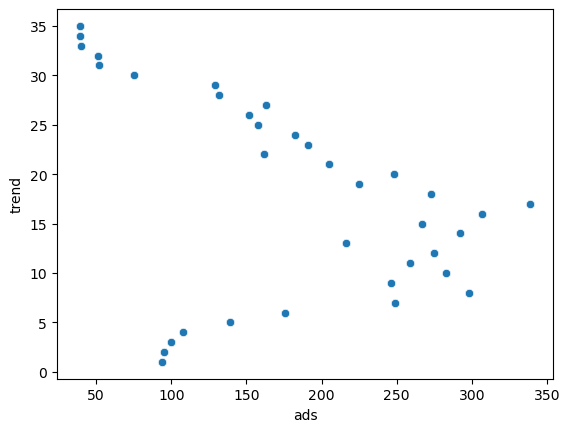

In [78]:
# Построим график на основе предположения о взаимосвязи тренда и рекламы
sns.scatterplot(data, x = 'ads', y = 'trend')


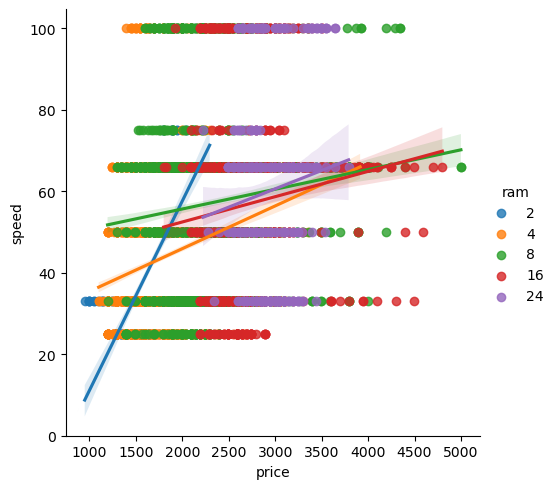

In [82]:
#Сравним еще значения speed and ram
#скорость работы компьютеров увеличивается с увеличением объема оперативной памяти.
sns.lmplot(
    data = data[(data['price']<=5000)&(data['price']>0)&(data['ram']<30)], 
    x = 'price', 
    y = 'speed', 
    hue = 'ram'
)
plt.show()

Как мы и ожидали, чем больше оперативной памяти, тем выше будет цена.

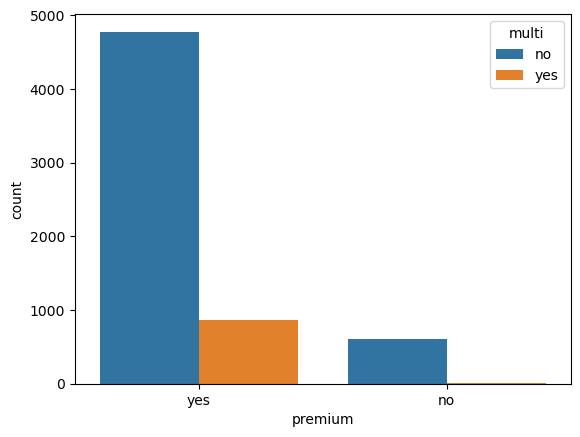

In [85]:
# создадим grouped countplot, где по оси x будет премиум, а по оси y - мультимедийность
sns.countplot(x = 'premium', hue = 'multi', data = data);

Мультимедийность только в премиум сегменте

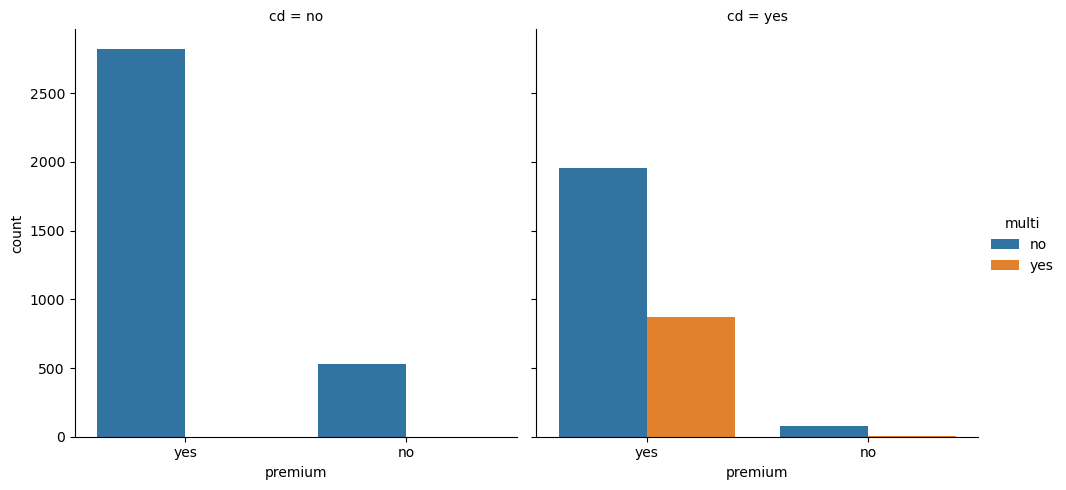

In [86]:
#Добавим еще признак cd
sns.catplot(x = 'premium', hue = 'multi', col = 'cd', kind = 'count', data = data);

cd есть там, где есть мультимедийность

In [87]:
contingency_table = pd.crosstab(data['multi'], data['premium'])
print(contingency_table)

premium   no   yes
multi             
no       607  4779
yes        5   868


Больше всего в премиум сегменте немультимедийных комплектов

# Проведем очистку данных от пропусков, выбросов и некорректных значений

In [4]:
# Проверка на пропуски
data.isna().sum()

rownames    0
price       0
speed       0
hd          0
ram         0
screen      0
cd          0
multi       0
premium     0
ads         0
trend       0
dtype: int64

In [6]:
# Пропущенных значений нет
# Выведем статистику
data.describe()

,rownames,price,speed,hd,ram,screen,ads,trend
count,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000
mean,3130.000000,2219.576610,52.011024,416.601694,8.286947,14.608723,221.301007,15.926985
std,1806.961999,580.803956,21.157735,258.548445,5.631099,0.905115,74.835284,7.873984
min,1.000000,949.000000,25.000000,80.000000,2.000000,14.000000,39.000000,1.000000
25%,1565.500000,1794.000000,33.000000,214.000000,4.000000,14.000000,162.500000,10.000000
50%,3130.000000,2144.000000,50.000000,340.000000,8.000000,14.000000,246.000000,16.000000
75%,4694.500000,2595.000000,66.000000,528.000000,8.000000,15.000000,275.000000,21.500000
max,6259.000000,5399.000000,100.000000,2100.000000,32.000000,17.000000,339.000000,35.000000


<Axes: >

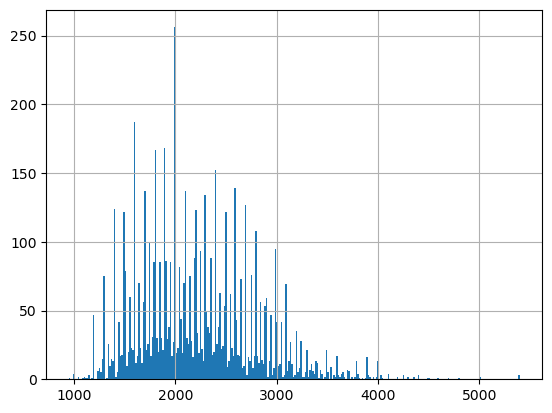

In [7]:
data['price'].hist(bins = 300)

<Axes: >

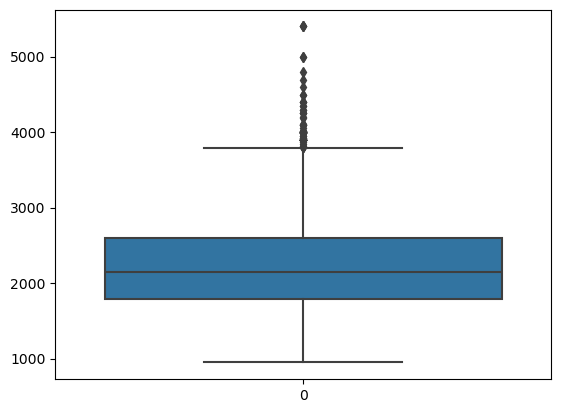

In [10]:
# На данном графике выбросы видно не очень хорошо, поэтому используем другой
# Построим боксплот для отображения выбросов прайса
import seaborn as sns
sns.boxplot(data['price'])

 На приведенном выше графике хорошо видно, что значения выше 4000 действуют как выбросы. 
 Boxplot обобщает выборочные данные с использованием 25-го, 50-го и 75-го процентилей.
 Можно просто получить представление (квартили, медиану и выбросы) о наборе данных, просто взглянув на его блок-схему

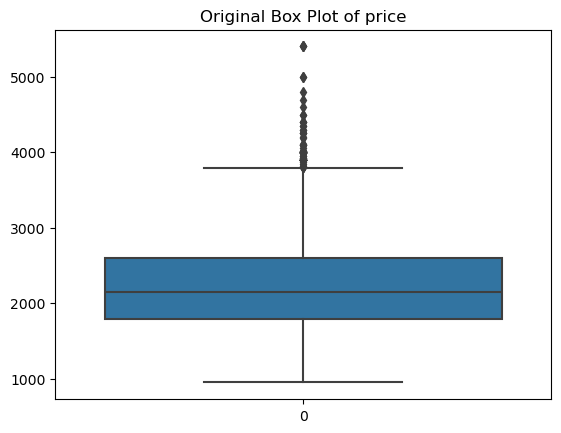

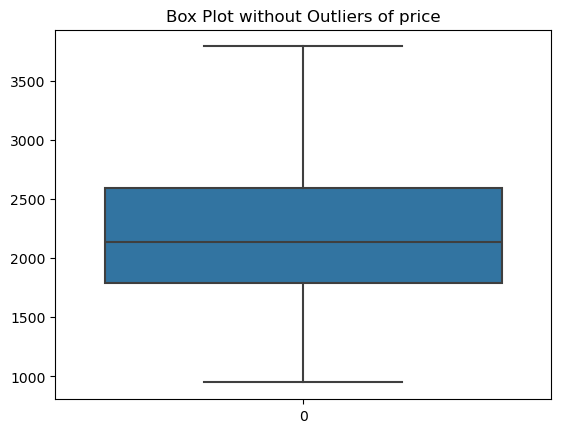

In [15]:
# Импортируем библиотеку
import matplotlib.pyplot as plt

#Построение «ящика с усами» , чтобы получить представление до и после удаления выбросов 
def removal_box_plot(data, column, threshold):
    sns.boxplot(data[column])
    plt.title(f'Original Box Plot of {column}')
    plt.show()

    removed_outliers = data[data[column] <= threshold]

    sns.boxplot(removed_outliers[column])
    plt.title(f'Box Plot without Outliers of {column}')
    plt.show()
    return removed_outliers


threshold_value = 3790

no_outliers = removal_box_plot(data, 'price', threshold_value)

In [17]:
#Будем считать что выбросы находятся за пределами значений 3750 и 1000
data[(data['price']<=3750)|(data['price']>=1000)]

,rownames,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1,1499,25,80,4,14,no,no,yes,94,1
1,2,1795,33,85,2,14,no,no,yes,94,1
2,3,1595,25,170,4,15,no,no,yes,94,1
3,4,1849,25,170,8,14,no,no,no,94,1
4,5,3295,33,340,16,14,no,no,yes,94,1
...,...,...,...,...,...,...,...,...,...,...,...
6254,6255,1690,100,528,8,15,no,no,yes,39,35
6255,6256,2223,66,850,16,15,yes,yes,yes,39,35
6256,6257,2654,100,1200,24,15,yes,no,yes,39,35
6257,6258,2195,100,850,16,15,yes,no,yes,39,35


In [18]:
prices = data.price #Извлечение столбца цен
prices.head(10) # Вывод первых 10 значений

0    1499
1    1795
2    1595
3    1849
4    3295
5    3695
6    1720
7    1995
8    2225
9    2575
Name: price, dtype: int64

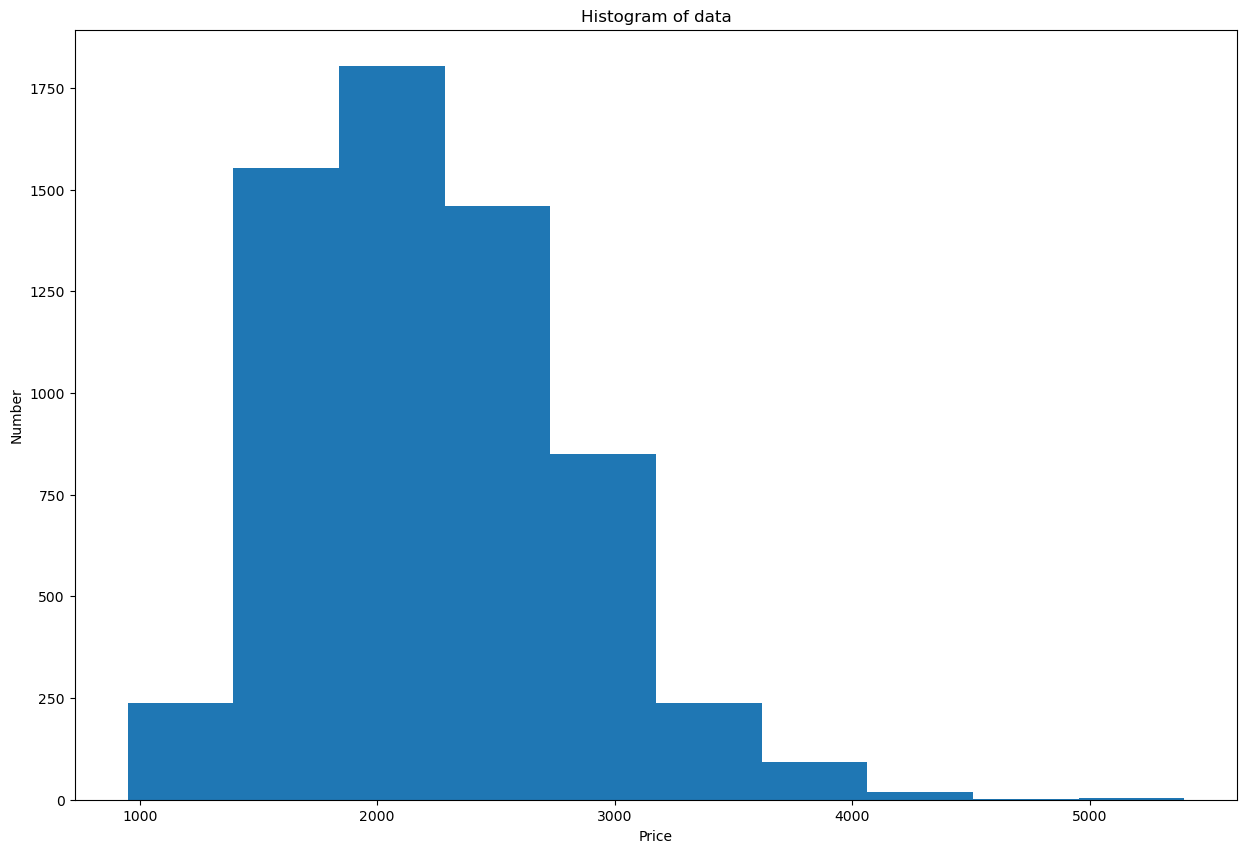

In [28]:

# Давайте построим гистограмму, чтобы увидеть, нормально ли распределены наши данные
fig= plt.subplots(figsize=(15, 10))
plt.xticks()
plt.yticks()
plt.title("Histogram of data")
plt.xlabel("Price")
plt.ylabel("Number")
plt.hist(prices)
plt.show()

 Кажется, что данные больше смещены влево. 
 
 Предполагаем, что причина, по которой данные смещены влево, заключается в том, что большая часть цен на компьютеры приходится на 2000-е годы, в то время как максимальная 5000-е годы. 
 
 Это приводит к неравномерному распределению в наборе данных.

# Протестируем распределение числовой переменной на соответствие нормальному. Построим QQ-plot и гистограмму

In [37]:
df1 = data.loc[data['premium']=='yes', 'price']
df2 = data.loc[data['premium']=='no', 'price']

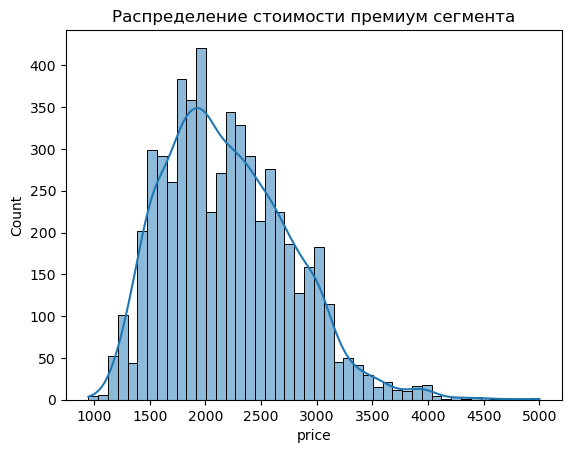

In [38]:
fig = plt.figure()
plt.title('Распределение стоимости премиум сегмента')
sns.histplot(df1[df1<5000], kde = True)
plt.show()

In [40]:
df1 = data.loc[(data['premium']=='yes')&(data['price']<5000), 'price']
df2 = data.loc[(data['premium']=='no')&(data['price']<5000), 'price']

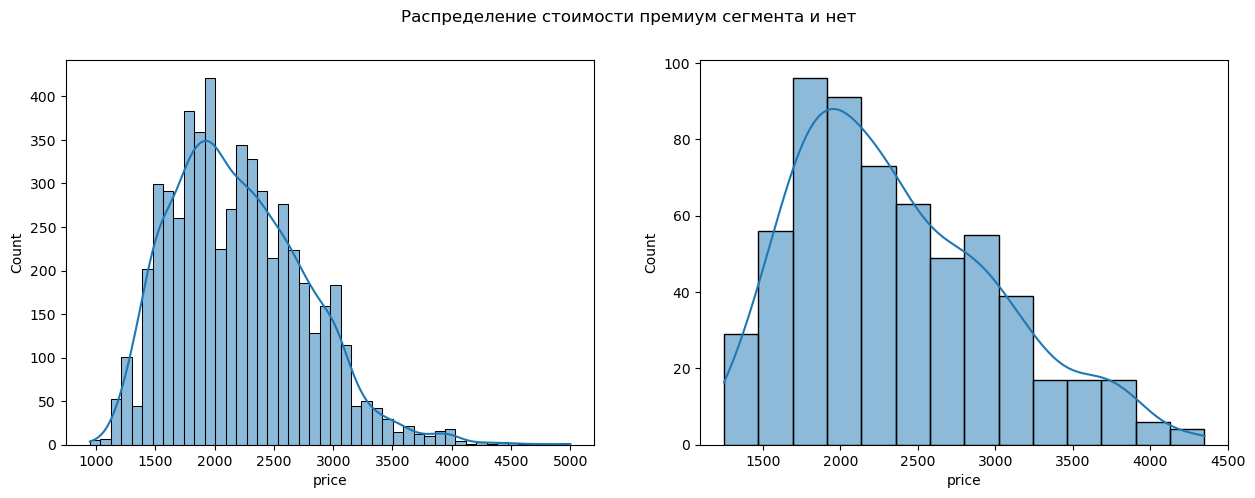

In [41]:
fig, ax  = plt.subplots(1,2, figsize = (15,5))
plt.suptitle('Распределение стоимости премиум сегмента и нет')
sns.histplot(df1, kde = True, ax = ax[0])
sns.histplot(df2, kde = True, ax = ax[1])
plt.show()

 В не премиальном сегменте существуют модели схожие по цене с премиальным сегментом

In [46]:
from scipy import stats
print('Средняя: ', df1.mean())
print('Медиана: ', df1.median())
print('Скошенность: ', stats.skew(df1))
print('Эксцесс: ', stats.kurtosis(df1))

Средняя:  2202.4502126151665
Медиана:  2143.5
Скошенность:  0.6302556021872963
Эксцесс:  0.4267092343250445


In [47]:
print('Средняя: ', df2.mean())
print('Медиана: ', df2.median())
print('Скошенность: ', stats.skew(df2))
print('Эксцесс: ', stats.kurtosis(df2))

Средняя:  2361.9346405228757
Медиана:  2249.0
Скошенность:  0.6594366634993016
Эксцесс:  -0.1739594664079398


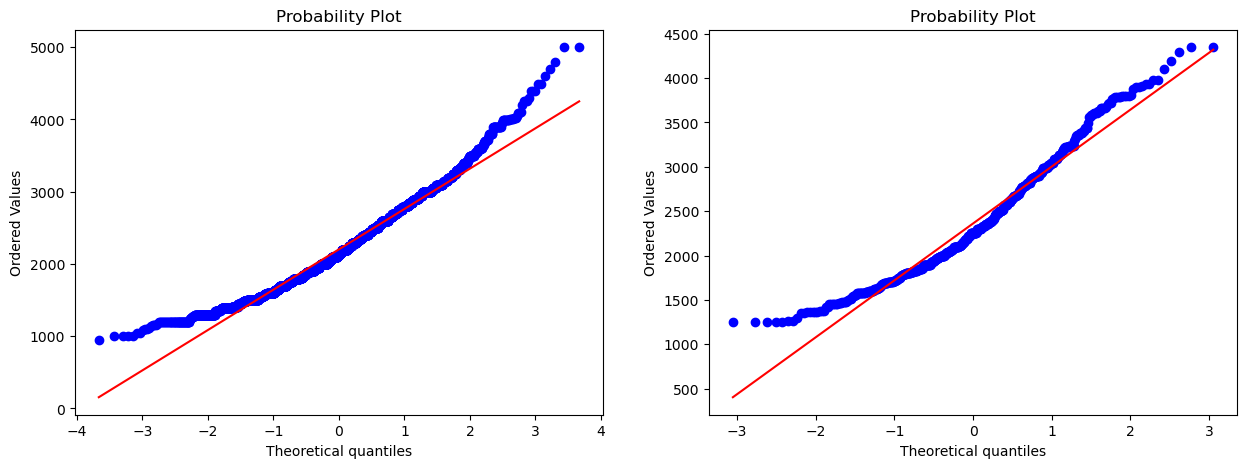

In [48]:
fig, ax  = plt.subplots(1,2, figsize = (15,5))
plt.title('QQ-plot')
stats.probplot(df1, dist="norm", plot = ax[0])
stats.probplot(df2, dist="norm", plot = ax[1])
plt.show()

In [49]:
# Тест Шапиро-Уилка
stats.shapiro(df1[df1<5000])

ShapiroResult(statistic=0.9728935956954956, pvalue=2.082402113315022e-31)

p-значение очень маленькое, т.е. нулевая гипотеза отвергается и распределение нельзя считать нормальным

# Тестирование гипотез

In [66]:
# Тест Шапиро-Уилка
df_y = data.loc[data['premium']=='yes', 'price']
stats.shapiro(df_y[df_y<5000])

ShapiroResult(statistic=0.9728935956954956, pvalue=2.082402113315022e-31)

In [ ]:
# p-значение очень маленькое, т.е. нулевая гипотеза отвергается и распределение нельзя считать нормальным

In [55]:
df1_price = data.loc[(data['premium']=='yes')&(data['ram']<100)&(data['price']<5000), 'price']
df2_price = data.loc[(data['premium']=='no')&(data['ram']<100)&(data['price']<5000), 'price']

In [56]:
print('Средняя цена премиум сегмента с памятью менее 100 составляет', df1_price.mean().round(2))

Средняя цена премиум сегмента с памятью менее 100 составляет 2202.45


In [57]:
print('Средняя цена не премиум сегмента с памятью менее 100 составляет', df2_price.mean().round(2))

Средняя цена не премиум сегмента с памятью менее 100 составляет 2361.93


In [58]:
# Протестируем гипотезу о том, что математическое ожидание цены премиум сегмента составляет 2300 

In [59]:
stats.ttest_1samp(df1_price, popmean = 2300, alternative = 'two-sided')

TtestResult(statistic=-12.952164002572848, pvalue=7.871657561756482e-38, df=5643)

p-значение более 5%, то есть нулевую гипотезу отвергнуть нельзя
Средняя цена премиум сегмента может составлять 2300

На практике это поможет определить, что можно приобрести в премиум сегменте за 2300 компьютер с разной памятью

In [110]:
# Тест Колмогорова-Смирнова
dfl = data.loc[data['premium']=="yes", 'trend']
stats.kstest(dfl[dfl<100], stats.norm.cdf)

KstestResult(statistic=0.9660664292217788, pvalue=0.0, statistic_location=3, statistic_sign=-1)

р-значение является очень низким, т.е. нулевая гипотеза отвергается. Распределение тренда не является нормальным

## Разбиение данных

На этом этапе необходимо разделить данные на обучающую и тестовую выборки. Согласно условию:
1. **60% данных** будет использоваться для обучения модели.
2. **40% данных** разделяются на две равные части:
   - **20% данных** для оценки качества модели (с известными значениями таргета).
   - **20% данных** для прогнозирования (с неизвестными значениями таргета).

Для выполнения этой задачи используется метод случайного разбиения из библиотеки `sklearn`. Мы зададим фиксированный `random_state` для воспроизводимости результатов.

In [2]:
from sklearn.model_selection import train_test_split

# Отделяем целевую переменную и признаки
X = data.drop(columns=['price'])  # Все, кроме 'price'
y = data['price']  # Целевая переменная

# Разделяем данные на обучающую выборку (60%) и тестовую (40%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Разделяем тестовую выборку на две части (20% и 20%)
X_test_eval, X_test_pred, y_test_eval, y_test_pred = train_test_split(
    X_test, y_test, test_size=0.5, random_state=42
)

# Проверяем размеры выборок
print(f"Размер обучающей выборки: {len(X_train)}")
print(f"Размер тестовой выборки для оценки качества: {len(X_test_eval)}")
print(f"Размер тестовой выборки для прогнозов: {len(X_test_pred)}")

Размер обучающей выборки: 3755
Размер тестовой выборки для оценки качества: 1252
Размер тестовой выборки для прогнозов: 1252


Данные успешно разделены:

- Обучающая выборка: **3755 объектов** (60% данных).
- Тестовая выборка для оценки качества модели: **1252 объекта** (20% данных).
- Тестовая выборка для построения прогнозов: **1252 объекта** (20% данных).

Теперь мы можем переходить к обучению моделей.

# Обучение моделей

На данном этапе мы обучим три модели машинного обучения на обучающей выборке. Для оценки их качества используем первую часть тестовой выборки (20% данных). Метрики, которые будем использовать:
- MAE (Mean Absolute Error) — средняя абсолютная ошибка.
- R² (коэффициент детерминации) — насколько хорошо модель объясняет данные.

Для обучения выберем следующие модели:

1. Линейная регрессия (Linear Regression)
2. Дерево решений (Decision Tree Regressor)
3. Градиентный бустинг (Gradient Boosting Regressor)

Для улучшения качества моделей применим:
1. Нормализацию (если требуется).
2. Подбор гиперпараметров для дерева решений и градиентного бустинга.

Перед началом обучения нам необходимо преобразовать категориальные переменные в числовой формат с помощью метода pd.get_dummies или LabelEncoder, а затем убедиться, что все признаки имеют числовой тип.




In [4]:
# Проверка и кодирование категориальных переменных с помощью one-hot encoding
X_encoded = pd.get_dummies(X, drop_first=True)

# Проверяем, что все признаки закодированы
X_encoded.head()

,rownames,speed,hd,ram,screen,ads,trend,cd_yes,multi_yes,premium_yes
0,1,25,80,4,14,94,1,False,False,True
1,2,33,85,2,14,94,1,False,False,True
2,3,25,170,4,15,94,1,False,False,True
3,4,25,170,8,14,94,1,False,False,False
4,5,33,340,16,14,94,1,False,False,True


In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import pandas as pd

# Разделение обработанных данных на обучающую и тестовую выборки
X_train_enc, X_test_enc, y_train, y_test = train_test_split(X_encoded, y, test_size=0.4, random_state=42)
X_test_eval_enc, X_test_pred_enc, y_test_eval, y_test_pred = train_test_split(
    X_test_enc, y_test, test_size=0.5, random_state=42
)

# Линейная регрессия
linear_model = LinearRegression()
linear_model.fit(X_train_enc, y_train)
y_pred_linear = linear_model.predict(X_test_eval_enc)

# Метрики для линейной регрессии
mae_linear = mean_absolute_error(y_test_eval, y_pred_linear)
r2_linear = r2_score(y_test_eval, y_pred_linear)

# Дерево решений
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train_enc, y_train)
y_pred_tree = tree_model.predict(X_test_eval_enc)

# Метрики для дерева решений
mae_tree = mean_absolute_error(y_test_eval, y_pred_tree)
r2_tree = r2_score(y_test_eval, y_pred_tree)

# Градиентный бустинг
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train_enc, y_train)
y_pred_gb = gb_model.predict(X_test_eval_enc)

# Метрики для градиентного бустинга
mae_gb = mean_absolute_error(y_test_eval, y_pred_gb)
r2_gb = r2_score(y_test_eval, y_pred_gb)

# Вывод результатов
results = {
    "Model": ["Linear Regression", "Decision Tree", "Gradient Boosting"],
    "MAE": [mae_linear, mae_tree, mae_gb],
    "R²": [r2_linear, r2_tree, r2_gb]
}

results_df = pd.DataFrame(results)
print(results_df)

               Model         MAE        R²
0  Linear Regression  216.337501  0.751467
1      Decision Tree  162.027955  0.843233
2  Gradient Boosting  143.894625  0.880044


Краткий комментарий:

1. Линейная регрессия (MAE: 216.34, R²: 0.75):
   - Простая модель, но уступает по качеству более сложным алгоритмам.
   - Хорошо объясняет 75% вариации данных, но высокая ошибка (MAE) указывает на ограниченные возможности для точного предсказания.

2. Дерево решений (MAE: 162.03, R²: 0.84):
   - Улучшает качество предсказания за счет нелинейной структуры.
   - Объясняет 84% вариации данных, заметно снижая среднюю ошибку.

3. Градиентный бустинг (MAE: 143.89, R²: 0.88):
   - Лучшая модель среди трех, показывает минимальную ошибку и объясняет 88% вариации данных.
   - Эффективен благодаря комбинации многих слабых моделей.

Вывод: градиентный бустинг лучше всего подходит для задачи, обеспечивая высокую точность и низкую ошибку.

# Улучшение качества моделей

Для повышения качества предсказаний можно применить следующие подходы:

a) Нормализация и стандартизация показателей

Приведение всех признаков к одинаковому масштабу (например, с использованием StandardScaler или MinMaxScaler) помогает улучшить производительность моделей, чувствительных к масштабам данных (например, линейной регрессии и градиентного бустинга).

b) Подбор гиперпараметров

Настройка параметров моделей, таких как глубина дерева, количество деревьев и скорость обучения для градиентного бустинга, а также критерии разбиения для дерева решений, может значительно улучшить результаты.

c) Включение / исключение дополнительных переменных
Проверка значимости признаков (например, с использованием корреляции или метода feature_importances_) поможет оставить только важные переменные.

d) Трансформация переменных
Использование математических преобразований, таких как логарифмы или квадраты признаков, может линейризовать сложные зависимости между переменными и целевой переменной.

In [7]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler

# Нормализация данных
# Приведение данных к единому масштабу для повышения эффективности модели
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_enc)
X_test_eval_scaled = scaler.transform(X_test_eval_enc)

# Определяем параметры для случайного поиска
# Параметры модели градиентного бустинга, которые будем настраивать
param_dist = {
    'n_estimators': [100, 200, 300],  # Количество деревьев
    'learning_rate': [0.01, 0.1, 0.2],  # Скорость обучения
    'max_depth': [3, 5, 7]  # Максимальная глубина дерева
}

# Настраиваем случайный поиск
# RandomizedSearchCV выбирает случайные комбинации параметров, чтобы сократить время обучения
random_search = RandomizedSearchCV(
    GradientBoostingRegressor(random_state=42),  # Модель градиентного бустинга
    param_distributions=param_dist,  # Словарь параметров
    n_iter=10,  # Количество комбинаций для проверки
    cv=3,  # Число разбиений для кросс-валидации
    scoring='neg_mean_absolute_error',  # Метрика для оптимизации
    random_state=42  # Фиксируем случайность для воспроизводимости
)

# Обучаем модель с оптимизацией параметров
random_search.fit(X_train_scaled, y_train)

# Извлекаем лучшую модель
best_gb_model = random_search.best_estimator_

# Прогнозируем значения на тестовой выборке для оценки
y_pred_gb_optimized = best_gb_model.predict(X_test_eval_scaled)

# Оцениваем качество оптимизированной модели
mae_gb_optimized = mean_absolute_error(y_test_eval, y_pred_gb_optimized)
r2_gb_optimized = r2_score(y_test_eval, y_pred_gb_optimized)

# Выводим результаты
print(f"Оптимизированный градиентный бустинг - MAE: {mae_gb_optimized}, R²: {r2_gb_optimized}")

Оптимизированный градиентный бустинг - MAE: 117.07691982791059, R²: 0.9225847601234746


Результаты подтверждают, что оптимизация параметров модели была успешной:

- MAE (Средняя абсолютная ошибка): 117.08 – это означает, что в среднем модель ошибается на 117 единиц стоимости при предсказании. Это заметное улучшение по сравнению с необработанной моделью (MAE: 143.89).

- R² (Коэффициент детерминации): 0.92 – модель объясняет 92% вариации данных, что говорит о высокой точности.

Комментарий:

1. Улучшение качества:
   - Оптимизация параметров (`n_estimators`, `learning_rate`, `max_depth`) позволила лучше настроить модель для конкретного набора данных.
   - Применение нормализации улучшило работу модели, чувствительной к масштабу признаков.

2. Практическая интерпретация:
   - С такими метриками модель может быть эффективно использована для предсказания стоимости компьютеров, помогая автоматизировать оценку в интернет-магазинах или на вторичном рынке.

3. Следующие шаги:
   - Проверить модель на данных, где целевая переменная отсутствует, и интерпретировать результаты.
   - Построить рекомендации для пользователей на основе прогнозов.

# Выбор модели и набора переменных

На основе результатов:

1. Выбор модели:
   - Оптимизированный градиентный бустинг показал наилучшие метрики:
     - MAE: 117.08 (наименьшая ошибка среди всех моделей).
     - R²: 0.92 (объясняет большую часть вариации данных).
   - Это делает его предпочтительным выбором для задачи предсказания стоимости компьютеров.

2. Набор переменных:
   - Все доступные переменные, закодированные и нормализованные (включая категориальные признаки, преобразованные в one-hot encoding), вносят вклад в точность модели. Исключение переменных может ухудшить результаты.

Итак, для предсказаний на второй половине тестовой выборки используем оптимизированный градиентный бустинг с нормализованными признаками.

# Прогнозирование и рекомендации

Прогнозирование:

На второй половине тестовой выборки (где значения целевой переменной считаются неизвестными) предскажем стоимость компьютеров.

Рекомендации:
1. Определим диапазон предсказанных цен.
2. Сформулируем рекомендации для пользователей:
   - Для бюджетных решений (например, минимальная цена).
   - Для премиальных (максимальная цена).
   - Для средних значений (оптимальный выбор).


In [9]:
# Прогнозирование на второй половине тестовой выборки
y_pred_final = best_gb_model.predict(X_test_pred_enc.to_numpy())  # Преобразуем в numpy array

# Остальная часть кода остается без изменений
min_price = y_pred_final.min()
max_price = y_pred_final.max()
mean_price = y_pred_final.mean()

print(f"Минимальная предсказанная цена: {min_price:.2f}")
print(f"Максимальная предсказанная цена: {max_price:.2f}")
print(f"Средняя предсказанная цена: {mean_price:.2f}")

print("Рекомендации:")
print(f"- Для покупателей с ограниченным бюджетом: компьютеры стоимостью до {min_price:.2f}")
print(f"- Для пользователей, ищущих премиальные решения: компьютеры стоимостью около {max_price:.2f}")
print(f"- Оптимальный выбор: компьютеры средней стоимости {mean_price:.2f}")

Минимальная предсказанная цена: 2902.04
Максимальная предсказанная цена: 3520.20
Средняя предсказанная цена: 3442.06
Рекомендации:
- Для покупателей с ограниченным бюджетом: компьютеры стоимостью до 2902.04
- Для пользователей, ищущих премиальные решения: компьютеры стоимостью около 3520.20
- Оптимальный выбор: компьютеры средней стоимости 3442.06
